<a href="https://colab.research.google.com/github/sbowma15/image_filter_demonstration/blob/main/image_filter_demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

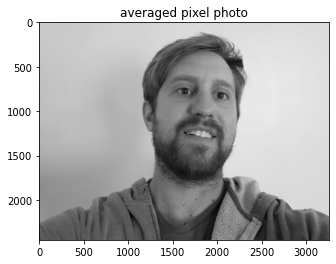

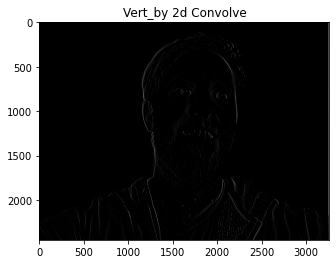

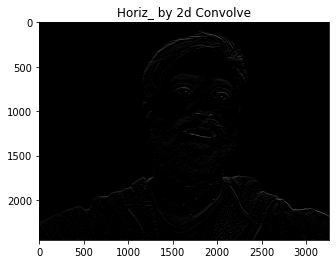

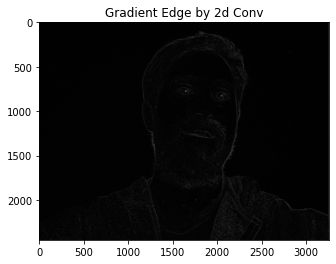

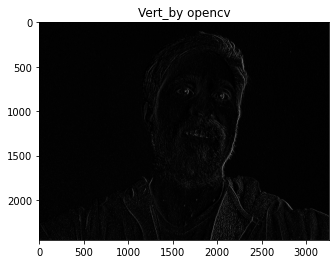

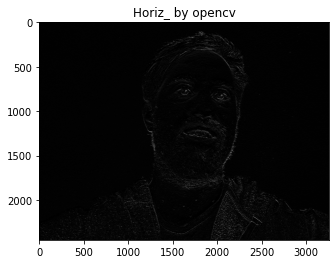

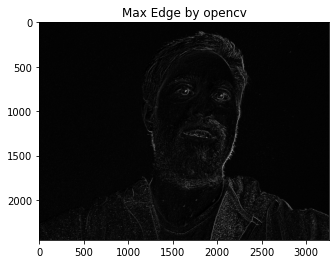

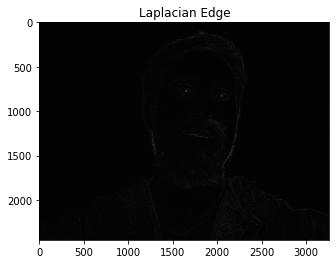

In [ ]:
#This program demonstrates several "Kernals" or "filters" used to manipulate the
#pixels of an image read into an array and then compared to an array which
#represents the kernal. Each filter has different values based on the style or
#technique of the particular type image filtration desired. This program also
#shows how convolved2D fucntion and filter2D function differ and how it can
#ultimately change the end output despite having the same goal.

#**** It is important to note that pyplot figures are stay opened until they are
#explicity closed. There are multiple techniques for closing the figures but
#none seemed to work well with google collab. These figures use RAM and results
#in a runtime error when 20 figures are left open. The result of using an import
#"matplotlib.pyplot as plt" allows the user to use functions: "plt.close(fig)"
#or plt.close(all) but then does not allow the image to be displayed with
#the google collab IDE. Because of this I have commented out the last functions
#used to display resulting images after being filtered, however, I assure you
#each filter works and can be tested by commenting out other calls for a figure

import numpy as np
import cv2
import math
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from google.colab.patches import cv2_imshow
# =============================================================================
##1  average filter
#=============================================================================

#Reads the image in from hardcoded path(Can be made to be dynamic later)
im=cv2.imread('/content/sample_data/shanepic2.jpg')

img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
length, width = img.shape

#creates an object then uses "imshow" function to display "img" within defined-
#parameters (The vmin and vmax are used to set the parameters of pixels)
fig = plt.figure() #creates the figure
plt.title('Grayscaled photo') #Titles photo
plt.imshow(img,cmap='gray', vmin=0, vmax=255) #shows image within set params
#plt.close(fig)

# averaging filter

#This is a 5 X 5 kernal in decimal form
#average filter always has to equal to 1, in this case, .04 X25 = 1 (5 x5 =25)
#Each pixel will be multiplied by .04 to bring each pixel closer to the average
#kern1 = np.array(    [[0.04, 0.04, 0.04, 0.04, 0.04],
#                   [0.04, 0.04, 0.04, 0.04, 0.04],
#                    [0.04, 0.04, 0.04, 0.04, 0.04],
#                    [0.04, 0.04, 0.04, 0.04, 0.04],
#                    [0.04, 0.04, 0.04, 0.04, 0.04]])

#This averaging kernal will multiply a 3 x 3 block of pixel values of 1/9 by
#each 3x3 block of pixels from the grayscaled image
kern2 = np.array(    [[1/9,1/9,1/9],
                     [1/9,1/9,1/9],
                    [1/9,1/9,1/9]])

#The openCV function "filter2D()" uses the grayscaled image to compare with the
# 3x3 block in the array "kern2". The "-1" indicates the desired depth of the
# output-image. In this case the depth is negative which tells the function the
# desired out put image depth should be the same as the source image's
average = cv2.filter2D(img, -1,kern2)

#creates the figure and displays the output of the cv2 filter 2D function
fig1 = plt.figure()
plt.title('averaged pixel photo')
plt.imshow(average,cmap='gray', vmin=0, vmax=255)

#closing the figure is important for reserving RAM, or runntime error occurs on
#google collab if too much RAM is used
#plt.close(fig1)

# =============================================================================#
#
#2  sobel filter
# =============================================================================

#this "filter box" is first created to represent the changes to be made with the
#verticle pixels. the
sobel_vert = np.array([[-1.0, 0.0, 1.0],
                       [-2.0, 0.0, 2.0],
                       [-1.0, 0.0, 1.0]])

sobel_horiz = sobel_vert.T

#the package is added so we can use the "convolded2D" function. This allows the
#user to avoid "normalizing" the pixel values after the convolution so the raw
#output image from both the horizontal and vertical pixel filter can be used to
#find the gradiant. This will provide more accurate inputs for finding gradiant
d_horiz = convolve2d(img, sobel_horiz, mode='same', boundary = 'symm', fillvalue=0)
d_vert = convolve2d(img, sobel_vert, mode='same',boundary='fill', fillvalue=0)

#Here we find the gradiant by adding the squared root values of both verticle
#and horizontal values immediately after being filtered. This gradient will be
#more accurate because of the accuracy of the "raw" inputs
grad=np.sqrt(np.square(d_horiz) + np.square(d_vert))

#This is the the workaround for the normalizing of the pixel values. This allows
#the user to set the pixel values within parameters AFTER gradient is calculated
#rather than before.
grad *= 255.0/ np.max(grad)

#image displayed after overlapping vertically convolved image pixels
fig2 = plt.figure()
plt.title('Vert_by 2d Convolve')
plt.imshow(d_vert,cmap='gray', vmin=0, vmax=255)
#plt.close(fig2)

#image diplayed after overlapping horizontally convolved image pixels
fig3 = plt.figure()
plt.title('Horiz_ by 2d Convolve')
plt.imshow(d_horiz,cmap='gray', vmin=0, vmax=255)
#plt.close(fig3)

#image displayed after overlapping gradient of both horizontal and verticle
# convolution using function "convolved2D()"
fig4 = plt.figure()
plt.title('Gradient Edge by 2d Conv')
plt.imshow(grad,cmap='gray', vmin=0, vmax=255)
#plt.close(fig4)

#the filter2D function is not "pure convolution", the function ensures a positve
#value for each pixel in the output within pixel value range. This function
#performs a "normaliztion" after the convolution.
##**Important** This does NOT give the raw output for the sobel "max edge"
dst_vert = cv2.filter2D(img, -1, sobel_vert)
dst_horiz = cv2.filter2D(img, -1, sobel_horiz)

plt.figure()
plt.title('Vert_by opencv')
plt.imshow(dst_vert,cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.title('Horiz_ by opencv')
plt.imshow(dst_horiz,cmap='gray', vmin=0, vmax=255)

#try to use sqrt of vert and horiz, check what is your output and why?
#This
#grad2 = np.sqrt(np.square(dst_vert) + np.square(dst_horiz)).astype(int)#

#plt.figure()#
#plt.title('Why it is so black?')#
#plt.imshow(grad2,cmap='gray', vmin=0, vmax=255)#

#finds the gradient of the verticle and horizontal convolution using cv function
#"filterd2D", which normalizes the pixel value output after convolution but
#before finding the gradient
nonRawGrad=np.maximum(dst_vert, dst_horiz)
plt.figure()
plt.title('Max Edge by opencv')
plt.imshow(nonRawGrad,cmap='gray', vmin=0, vmax=255)
# =============================================================================
#3  Laplacian
# =============================================================================
#This method essentially highlights regions of rapid intesity change. The way
#the filters/ kernals work are the same as the above filters, however the method
#for finding the area of rapid change is done by multiplying the center pixel by
#by the negation of its surrounding sum of "weighted one values"
#lapKern = np.array([         [0.0,  1.0, 0.0],
#                            [1.0, -4.0, 1.0],
#                            [0.0,  1.0, 0.0],       ])
# alternate form uses diagonals
lapKern2 = np.array([        [1.0,  1.0, 1.0],
                            [1.0, -8.0, 1.0],
                            [1.0,  1.0, 1.0]        ])

#uses filter2D to overlap both source and filter pixel values
lapEdge = cv2.filter2D(img, -1, lapKern2)

fig5 = plt.figure()
plt.title('Laplacian Edge')
plt.imshow(lapEdge,cmap='gray', vmin=0, vmax=255)
#plt.close(fig5)

# =============================================================================
# 4  median filter
# also check    cv.medianBlur(src, dst, 5);
# =============================================================================

#median filter replaces the value of a pixel by the median of the grey-levels in
#the neighbourhood of that pixel as shown below.

#first we return the shape of the image array and sets the height and width
height,width = np.shape(img)

#returns an array the same shape and size specified. In this case the array size
#and shape is literally "height by Width"
median = np.zeros((height,width),dtype=float)

#both of these for loops use function "range()" to iterate through each pixel
#value saved in its respective array
for i in range(1,height-2):

    #this iterates through the array holding the "width" array values
    for j in range(1,width-2):

      #Here original grayscaled photo pixels are iterated through, "flattened"
      #into an "ndarray", which is a a N-Dimensional array. which is a tuple of
      #N non-negative integers that specify the sizes of each dimension. The
      #array values are sorted and placed in "sorted_pixels".
      sorted_pixels = sorted(np.ndarray.flatten(img[i-1:i+2,j-1:j+2]))

      #the sorted pixels become the inputs for the median bewteen the two
      #dementions (width and height)
      median[i][j] = sorted_pixels[4]

  #  fig6 = plt.figure()
  #  plt.title('median filter')
  #  plt.imshow(median,cmap='gray', vmin=0, vmax=255)
  #  plt.close(fig6)
# =============================================================================
# 5  gaussian filter
# =============================================================================
#from scipy.ndimage import gaussian_filter

#If function "gaussian_filter()" is called the image is passed in along with the
#standard deviation, represented by sigma. The standard deviations for Gaussian
#filters are given for each axis as a sequence, or as a single number. In this
#case a single number is given so it is equal for all axies.
#gaussian_filter(img, sigma=1)

#This kernal is used like the kernals in the other filters above. This one
#uses a 5 by 5 block of values
gaussKernal=np.array([       [ 4,  6,  8,  9, 11],
                       [10, 12, 14, 15, 17],
                       [20, 22, 24, 25, 27],
                       [29, 31, 33, 34, 36],
                       [35, 37, 39, 40, 42]])

#this divides the array by the sum of itself for relativity then put back into
#"gaussKernal"
gaussKernal =gaussKernal/np.sum(gaussKernal)

Gaussian = cv2.filter2D(img, -1, gaussKernal)

#******I have this section commented out because figures using plt. functions
#apparently use ram and I ran out of RAM using the above filters, otherwise a
#runtime error occurs. (I will look further into ways around this)
#plt.figure()
#plt.title('Gaussian blur')
#plt.imshow(Gaussian,cmap='gray', vmin=0, vmax=255)

